<a href="https://colab.research.google.com/github/aicharya/ud120-projects/blob/master/outliers/outlier_removal_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/aicharya/ud120-projects.git

Cloning into 'ud120-projects'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 5214 (delta 17), reused 0 (delta 0), pack-reused 5185
Receiving objects: 100% (5214/5214), 19.81 MiB | 24.44 MiB/s, done.
Resolving deltas: 100% (4468/4468), done.


In [2]:
import os
os.chdir('ud120-projects/outliers')
os.listdir(os.getcwd())

['outlier_cleaner.py',
 'outlier_removal_regression.ipynb',
 'practice_outliers_ages.pkl',
 'practice_outliers_net_worths.pkl',
 'enron_outliers.py',
 'outlier_removal_regression.py']

In [0]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

In [0]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).
        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
    ### your code goes here
    
    return cleaned_data

### load up some practice data with outliers in it

In [0]:
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features

In [0]:
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

from sklearn.model_selection import train_test_split

ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

In [0]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg = reg.fit(ages_train, net_worths_train)

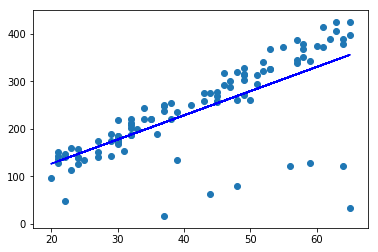

In [9]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

### identify and remove the most outlier-y points

In [0]:
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data

In [11]:
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

outlierCleaner() is returning an empty list, no refitting to be done
